In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [3]:
img_dir = r'C:\Users\KIIT\Documents\AICrowd\train_images'

In [4]:
df = pd.read_csv("train.csv")
df

ImageId                 ClassName
0     f27632d7e5.jpg                     water
1     efa87919ed.jpg    pizza-margherita-baked
2     4f169e8c8d.jpg                  broccoli
3     a6956654bf.jpg    salad-leaf-salad-green
4     d99ce8c3bf.jpg                       egg
...              ...                       ...
9318  ba8233c7d2.jpg  bread-french-white-flour
9319  2090043907.jpg                  wine-red
9320  8762d1cefd.jpg                    carrot
9321  28e7439245.jpg                  broccoli
9322  ba263cfb41.jpg                  cucumber

[9323 rows x 2 columns]

In [5]:
df_food_filename = df['ImageId']
df_food_filename[0]
df_food_name = df['ClassName']

(464, 464, 3)
f27632d7e5.jpg


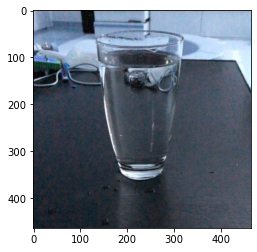

In [6]:
img = df_food_filename[0]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

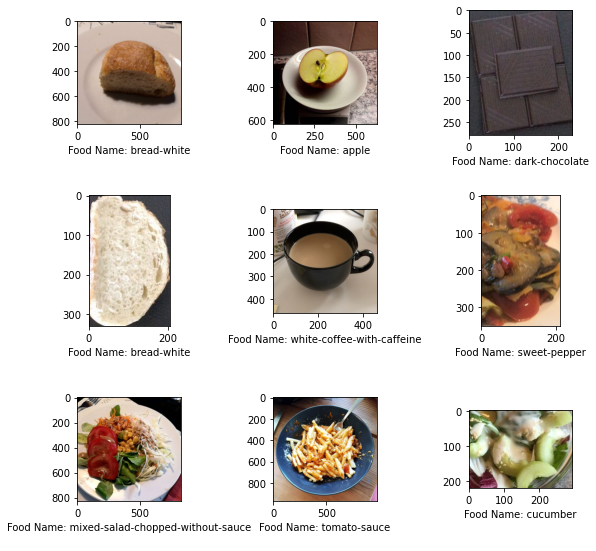

In [7]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_food_filename[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Food Name: {}\n'.format(df_food_name[i+9]))
    
plt.tight_layout()

In [8]:
a  = np.array(df_food_filename)
paths = []
for i in range(len(a)):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [9]:
paths

['C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\f27632d7e5.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\efa87919ed.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\4f169e8c8d.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\a6956654bf.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\d99ce8c3bf.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\0c2b1641a8.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\3f7e5ed3a9.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\ffcfba255c.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\b0687e0bfc.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\d6dc2e4278.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\236b534c7c.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\5fbcb6b69d.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\495410143a.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\train_images\\577a2f73c3.jpg',
 'C:\\Users\\KIIT\\D

In [10]:
data = []
for i in range(len(a)):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [11]:
data = np.array(data)
data.shape

(9323, 224, 224, 3)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [13]:
df.ClassName = le.fit_transform(df.ClassName)

In [14]:
x = data
y = df.ClassName

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

### Resnet 50

In [23]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [24]:
IMAGE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [25]:
for layers in vgg.layers:
    layers.trainable = False

In [27]:
x = Flatten()(vgg.output)
prediction = Dense(61,activation = 'softmax')(x)

In [28]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [29]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [31]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
263/263 [==============================] - 2912s 11s/step - loss: 53.7563 - accuracy: 0.3485
Epoch 2/10
263/263 [==============================] - 1906s 7s/step - loss: 10.8489 - accuracy: 0.8166
Epoch 3/10
263/263 [==============================] - 1845s 7s/step - loss: 6.1014 - accuracy: 0.8875
Epoch 4/10
263/263 [==============================] - 1715s 7s/step - loss: 5.6337 - accuracy: 0.9063
Epoch 5/10
263/263 [==============================] - 1526s 6s/step - loss: 4.9592 - accuracy: 0.9201
Epoch 6/10
263/263 [==============================] - 1927s 7s/step - loss: 4.6979 - accuracy: 0.9249
Epoch 7/10
263/263 [==============================] - 2027s 8s/step - loss: 3.8754 - accuracy: 0.9398
Epoch 8/10
263/263 [==============================] - 2029s 8s/step - loss: 3.8877 - accuracy: 0.9397
Epoch 9/10
263/263 [==============================] - 37489s 143s/step - loss: 3.6109 - accuracy: 0.9435
Epoch 10/10
263/263 [==============================] - 1717s 7s/step - loss:

In [35]:
y_pre = model2.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[2, 14, 9, 36, 39, 58, 35, 17, 23, 54]

In [34]:
y_test[:10]

8363     2
4200    14
7214     9
5068    60
2162    12
5977    58
718     31
3837    17
9127    42
6276    15
Name: ClassName, dtype: int32

In [36]:
model2.evaluate(x_test,y_test)

30/30 [==============================] - 214s 7s/step - loss: 140.8611 - accuracy: 0.3859


[140.86111450195312, 0.3858520984649658]

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.89      0.50      0.64        16
           2       0.10      0.50      0.16         6
           3       0.67      0.84      0.74        19
           4       1.00      0.82      0.90        11
           5       0.00      0.00      0.00         8
           6       0.33      0.18      0.24        11
           7       0.00      0.00      0.00         3
           8       0.20      0.17      0.18         6
           9       0.53      0.26      0.35        66
          10       0.00      0.00      0.00        12
          11       0.24      0.55      0.34        38
          12       0.00      0.00      0.00         5
          13       0.28      0.22      0.25        36
          14       0.23      0.43      0.30        30
          15       0.00      0.00      0.00        17
          16       0.08      0.17      0.11         6
          17       0.88    

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
ab = {'water': 55,
 'pizza-margherita-baked': 41,
 'broccoli': 12,
 'salad-leaf-salad-green': 44,
 'egg': 23,
 'butter': 13,
 'bread-white': 9,
 'apple': 1,
 'dark-chocolate': 22,
 'white-coffee-with-caffeine': 57,
 'sweet-pepper': 50,
 'mixed-salad-chopped-without-sauce': 35,
 'tomato-sauce': 54,
 'cucumber': 21,
 'cheese': 15,
 'pasta-spaghetti': 39,
 'rice': 43,
 'zucchini': 60,
 'salmon': 46,
 'mixed-vegetables': 36,
 'espresso-with-caffeine': 24,
 'banana': 3,
 'strawberries': 49,
 'mayonnaise': 33,
 'almonds': 0,
 'bread-wholemeal': 11,
 'wine-white': 59,
 'hard-cheese': 28,
 'ham-raw': 27,
 'tomato': 53,
 'french-beans': 25,
 'mandarine': 32,
 'wine-red': 58,
 'potatoes-steamed': 42,
 'croissant': 20,
 'carrot': 14,
 'salami': 45,
 'boisson-au-glucose-50g': 6,
 'biscuits': 5,
 'corn': 19,
 'leaf-spinach': 31,
 'tea-green': 52,
 'chips-french-fries': 17,
 'parmesan': 38,
 'beer': 4,
 'bread-french-white-flour': 7,
 'coffee-with-caffeine': 18,
 'chicken': 16,
 'soft-cheese': 48,
 'tea': 51,
 'avocado': 2,
 'bread-sourdough': 8,
 'gruyere': 26,
 'sauce-savoury': 47,
 'honey': 29,
 'mixed-nuts': 34,
 'jam': 30,
 'bread-whole-wheat': 10,
 'water-mineral': 56,
 'onion': 37,
 'pickle': 40}

### Testing Dataset

In [43]:
df_test = pd.read_csv("test.csv")
df_test

ImageId
0    90e63a2fde.jpg
1    a554d1ca8d.jpg
2    48317e8ee8.jpg
3    79528df667.jpg
4    6d2f2f63f5.jpg
..              ...
479  843b8695df.jpg
480  584490f483.jpg
481  d5df1ab5ec.jpg
482  79e3e01b88.jpg
483  a05a4fe910.jpg

[484 rows x 1 columns]

In [45]:
df_test_name = df_test['ImageId']
df_test_name[0]

'90e63a2fde.jpg'

In [41]:
img_dir1 = r'C:\Users\KIIT\Documents\AICrowd\test_images'
img_dir1

'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images'

(464, 464, 3)
90e63a2fde.jpg


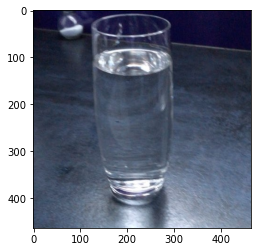

In [47]:
img = df_test_name[0]
image = cv2.imread(os.path.join(img_dir1, img))
plt.imshow(image)
print(image.shape)
print(img)

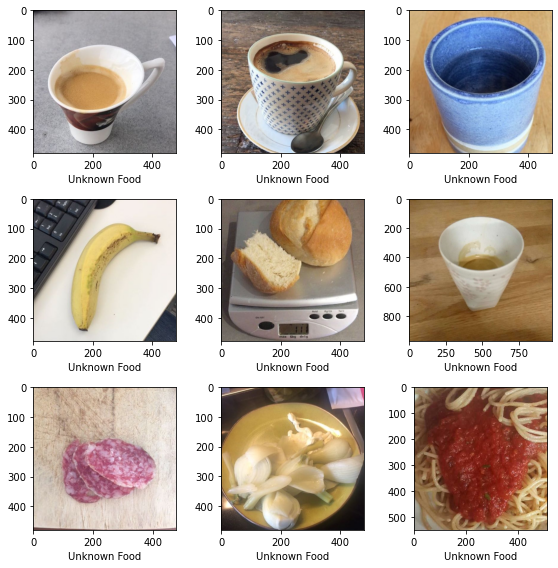

In [51]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_test_name[i+9]
    image = cv2.imread(os.path.join(img_dir1, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Unknown Food')
    
plt.tight_layout()

In [54]:
a  = np.array(df_test_name)
path1 = []
for i in range(len(a)):
    img = a[i]
    image = os.path.join(img_dir1, img)
    path1.append(image)

In [55]:
path1

['C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\90e63a2fde.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\a554d1ca8d.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\48317e8ee8.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\79528df667.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\6d2f2f63f5.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\258c5ae526.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\61f629b44f.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\3a0fcc1d6a.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\7bd6e99cdc.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\f00fca6337.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\283ee18c12.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\78eb0a7bb1.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\90265e9f71.jpg',
 'C:\\Users\\KIIT\\Documents\\AICrowd\\test_images\\ff8c0a5300.jpg',
 'C:\\Users\\KIIT\\Documents\\AICr

In [56]:
data = []
for i in range(len(a)):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [57]:
len(data)

484

In [58]:
data = np.array(data)
data.shape

(484, 224, 224, 3)

In [63]:
y_pre = model2.predict(data)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[55, 41, 12, 44, 23, 2, 9, 13, 9, 11]

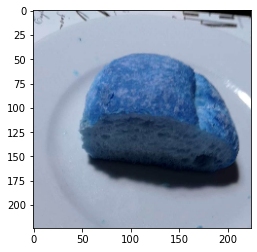

In [70]:
plt.imshow(data[9])

In [66]:
ab

{'water': 55,
 'pizza-margherita-baked': 41,
 'broccoli': 12,
 'salad-leaf-salad-green': 44,
 'egg': 23,
 'butter': 13,
 'bread-white': 9,
 'apple': 1,
 'dark-chocolate': 22,
 'white-coffee-with-caffeine': 57,
 'sweet-pepper': 50,
 'mixed-salad-chopped-without-sauce': 35,
 'tomato-sauce': 54,
 'cucumber': 21,
 'cheese': 15,
 'pasta-spaghetti': 39,
 'rice': 43,
 'zucchini': 60,
 'salmon': 46,
 'mixed-vegetables': 36,
 'espresso-with-caffeine': 24,
 'banana': 3,
 'strawberries': 49,
 'mayonnaise': 33,
 'almonds': 0,
 'bread-wholemeal': 11,
 'wine-white': 59,
 'hard-cheese': 28,
 'ham-raw': 27,
 'tomato': 53,
 'french-beans': 25,
 'mandarine': 32,
 'wine-red': 58,
 'potatoes-steamed': 42,
 'croissant': 20,
 'carrot': 14,
 'salami': 45,
 'boisson-au-glucose-50g': 6,
 'biscuits': 5,
 'corn': 19,
 'leaf-spinach': 31,
 'tea-green': 52,
 'chips-french-fries': 17,
 'parmesan': 38,
 'beer': 4,
 'bread-french-white-flour': 7,
 'coffee-with-caffeine': 18,
 'chicken': 16,
 'soft-cheese': 48,
 'tea'

In [72]:
new_dict = dict([(value, key) for key, value in ab.items()])
ab = new_dict

In [76]:
df_test['Label'] = y_pred

In [78]:
a = []
for i in y_pred:
    a.append(ab[i])

In [81]:
df_test['ClassName'] = a

In [84]:
df_test = df_test.drop(['Label'],axis = 1)

In [85]:
df_test.to_csv("Submission_Dataset.csv")